In [2]:
import os
import sys

sys.path.append("..")
os.chdir("/home/sean/HAI/main_server/sumica")

In [6]:
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
mongo = client.sumica4

In [59]:
import time
query = {"user_name": "sean", "cam_id":"cam1", "pose":{"$exists": True}, "detections":{"$exists": True}, "time": {"$gt": time.time()-3600*24, "$lt": time.time()}}
results = list(mongo.images.find(query))

In [60]:
len(results)

2737

In [79]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
from flask import Flask
app = Flask(__name__)
app.config.from_object('config.Config')
from scipy.misc import imread

with app.app_context():
    from controllers import utils

/home/sean/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


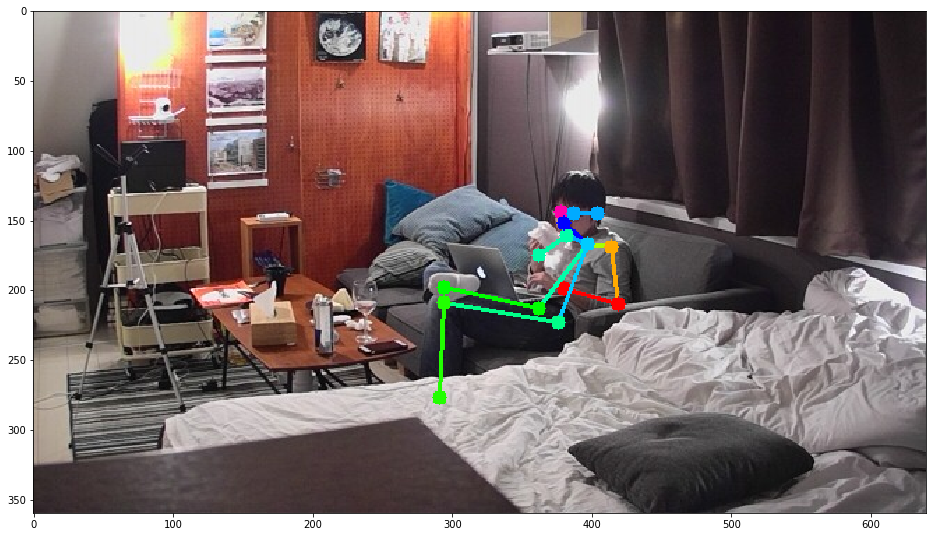

In [81]:


img = utils.visualize(imread("datafiles/images/raw_images/" + results[0]["filename"]), results[0], draw_objects=False)
plt.figure(figsize = (16,12))
#plt.imshow(imread("datafiles/images/raw_images/" + results[0]["filename"]))
plt.imshow(img)

In [67]:
import cv2

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

for i, r in enumerate(results):
    img = imread("datafiles/images/raw_images/" + r["filename"])
    #img = utils.visualize(imread("datafiles/images/raw_images/" + r["filename"]), r, draw_objects=False)
    cv2.imwrite("datafiles/frames/img%04d.png" % i, img[:,:,[2,1,0]])

out.release()

/home/sean/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
